In [1]:
# Para NO realizar 'upload' data
# importando archivo de datos desde el drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1wunEQPvINiHD5JqVa6Ug9wRpNEFwo-ju'})
download.GetContentFile('archive.zip')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('archive.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [4]:
listed_in = df['listed_in'].str.split(r', ', expand=True).stack()

In [5]:
listed_in = pd.DataFrame({'N':listed_in.value_counts(), 'N_rel':listed_in.value_counts(normalize=True)})

In [6]:
listed_in.reset_index(names='Genero_Pelicula',inplace=True)

In [7]:
listed_in

,Genero_Pelicula,N,N_rel
0,Drama,3687,0.201376
1,Comedy,2099,0.114643
2,Action,1657,0.090502
3,Suspense,1501,0.081982
4,Kids,1085,0.059260
5,Documentary,993,0.054236
6,Special Interest,980,0.053526
7,Horror,875,0.047791
8,Romance,674,0.036812
9,Animation,547,0.029876


### Gráfico 1: (frecuencias) por género

<ipython-input-8-936070c3892c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g0.set_xticklabels(labels=listed_in['Genero_Pelicula'],rotation=90)


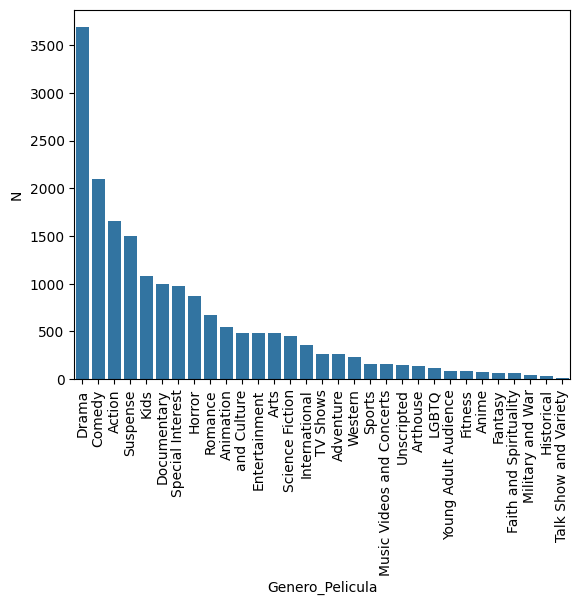

In [8]:
g0=sns.barplot(listed_in, x='Genero_Pelicula', y='N')
g0.set_xticklabels(labels=listed_in['Genero_Pelicula'],rotation=90)
plt.show()

## Gráfico 2: (frecuencias relativas) por género

<ipython-input-9-7173ae6b1327>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(labels=listed_in['Genero_Pelicula'],rotation=90)


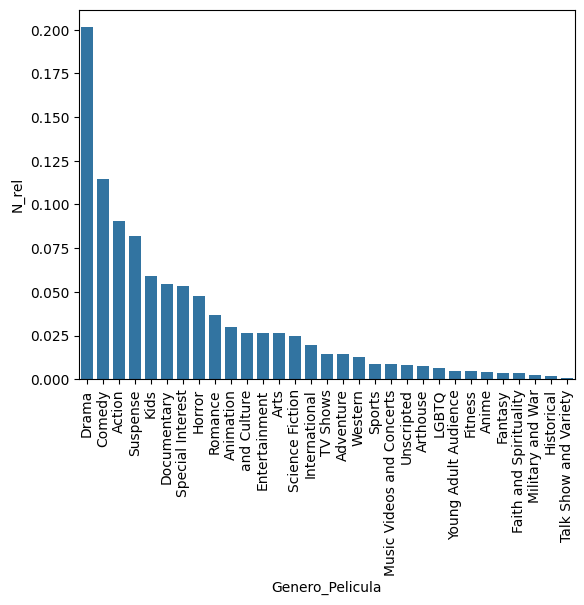

In [9]:
g1=sns.barplot(listed_in, x='Genero_Pelicula', y='N_rel')
g1.set_xticklabels(labels=listed_in['Genero_Pelicula'],rotation=90)
plt.show()

## Gráfico 3: Distribución Anual de Estrenos de acuerdo al tipo de show (Movie - Tv Show)

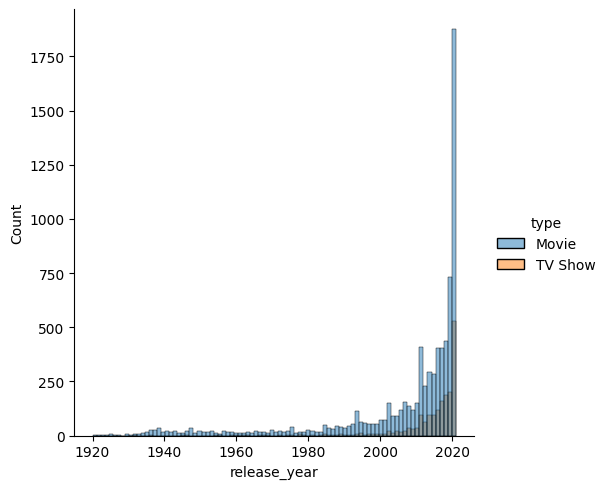

In [10]:
g3=sns.displot(df, x="release_year", hue="type")
plt.show()

## Grafico 4 Porcentaje por género de show

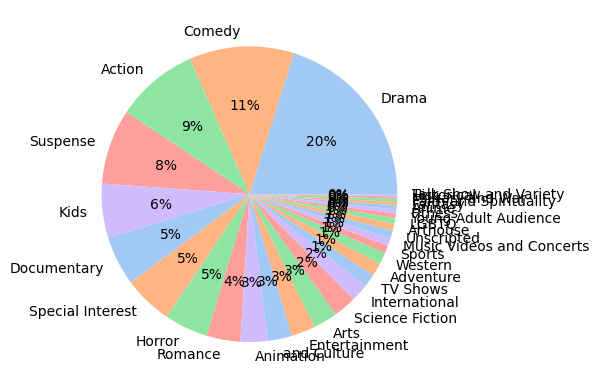

In [11]:
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(listed_in.N_rel, labels=listed_in.Genero_Pelicula, colors = colors, autopct='%.0f%%')
plt.show()

## Grafico 5: Gráfico de dispersiones

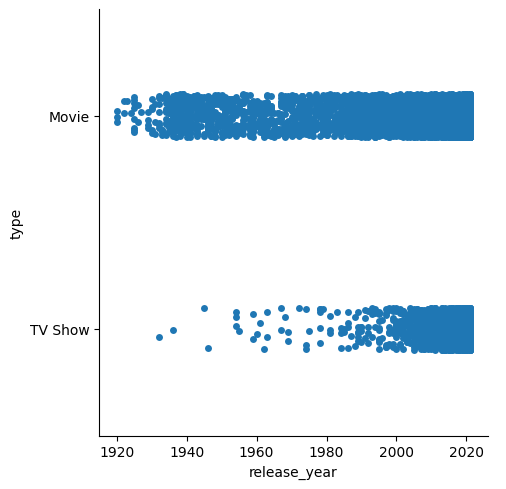

In [12]:
sns.catplot(data=df, x="release_year", y="type")
plt.show()

## Grafico 6: Gráficos de Caja y Bigotes

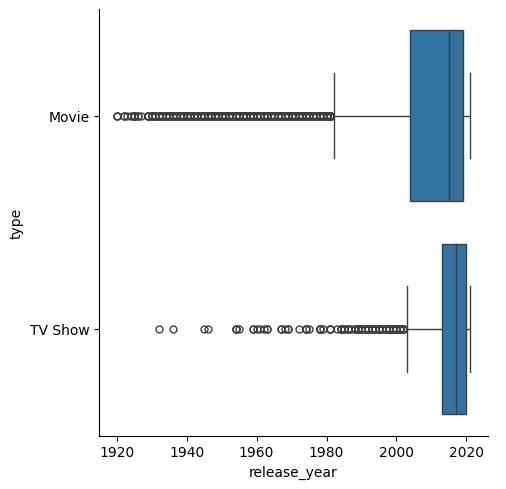

In [13]:
sns.catplot(data=df, x="release_year", y="type", kind="box")
plt.show()